<a href="https://colab.research.google.com/github/AsionNguyen/Asion/blob/master/Cartan_angular_invariant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev
import random as rd
import urllib.request as ur
import cmath

#file_csv = "/home/administrateur/Téléchargements/ParaView-5.9.0-MPI-Linux-Python3.8-64bit/data/3.000_0.csv"
#file_csv = "https://raw.githubusercontent.com/AsionNguyen/paraviewglance/main/3.000_0.csv"
file_csv = "https://raw.githubusercontent.com/AsionNguyen/paraviewglance/main/points.csv"
#df = pd.read_csv(file_csv, header=None, names=['x','y','z', 't'])
#df

# Load data into matrix $M$


In [3]:
file = ur.urlopen(file_csv)

#M= np.loadtxt(open(file_csv, "rb"), delimiter=",", skiprows=1)
M = np.loadtxt(file, delimiter=",", skiprows=1 )
M

array([[-0.99547778,  0.09008632, -0.00509233, -0.02970727],
       [-0.99545422,  0.09014332, -0.00322549, -0.03057246],
       [-0.99536786,  0.09008264, -0.01797717, -0.02836824],
       ...,
       [ 0.81995741, -0.40992453, -0.02597261,  0.39869431],
       [ 0.82004556, -0.4004159 , -0.00763982,  0.40882028],
       [ 0.82021248, -0.40634147, -0.01877566,  0.40222578]])

In [4]:
M[0]

array([-0.99547778,  0.09008632, -0.00509233, -0.02970727])

In [5]:
len(M)

23875

# Converse $M$ into complex numbers

In [11]:
def point(m):
    a = complex(m[0], m[1])
    b = complex(m[2], m[3])
    return np.array([a, b])

In [12]:
point(M[0])[0].conjugate()

(-0.99547777505231-0.0900863234531j)

#Bilinear form and triple product

Given \\(a=(a_0, a_1)\in \mathbb{C}^2, b=(b_0,b_1)\in \mathbb{C}^2\\). We define the following bilinear form 
$$B(a,b)= a_0\bar b_0 - a_1 \bar b_1$$
and the following `triple product` of 3 points \\(a,b,c \in \mathbb{C}^2\\)
$$TP(a,b,c)=B(a,b)B(b,c)B(c,a)$$
and the `cross ratio` of 4 points \\(a,b,c,d \in \mathbb{C}^2\\)
$$CR(a,b,c,d)=\frac{B(a,c)B(b,d)}{B(a,d)B(b,c)}$$

Then the Cartan angular invariant $A$ satisfies
$$\frac{TP(a,b,c)}{TP(a,c,b)}=e^{2iA}$$ for all \\(a,b,c\in \mathbb{C}^2\\).

In fact, we have 
$$\begin{align*}
\frac{TP(a,b,c)}{TP(a,c,b)}&=\frac{B(a,b)B(b,c)B(c,a)}{B(a,c)B(c,b)B(b,a)}\\
&=\frac{B(a,b)B(b,c)B(c,a)}{\bar B(c,a)\bar B(b,c)\bar B(a,b)}\\
&=\frac{TP(a,b,c)}{\overline{TP}(a,b,c)}
\end{align*}
$$

Then $2A=2\arg (TP(a,b,c))$, finally $A=\arg TP(a,b,c)$

In [13]:
def B(a,b):
    return a[0]*b[0].conjugate()-a[1]*b[1].conjugate()

def triple_product(a,b,c):
    return B(a,b)*B(b,c)*B(c,a)

def cross_ratio(a,b,c,d):
    if (B(a,d)*B(b,c)==0): 
        return 0
    else:
        return B(a,c)*B(b,d)/(B(a,d)*B(b,c))


In [15]:
B(point(M[0]), point(M[1]))

(0.9981485819016571+0.00011872264085331416j)

In [14]:
cross_ratio(point(M[0]), point(M[1]), point(M[2]), point(M[3]))

(0.9999764682074403-7.206603984754811e-06j)

#Random list of cross ratios and Cartan angular invariant

In [24]:
rd_list=[]

for i in range(50000):
    x = rd.randint(0,len(M)-1)
    y = rd.randint(0,len(M)-1)
    z = rd.randint(0,len(M)-1)
    t = rd.randint(0,len(M)-1)
    
    r = cmath.phase(cross_ratio(point(M[x]), point(M[y]), point(M[z]), point(M[t])))
    #print(r)
    #print("\n")
    #if r != 0 and abs(r)<=np.pi:
    rd_list.append(r)

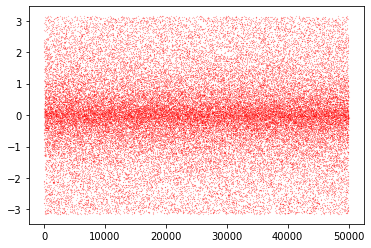

In [33]:
plt.plot(rd_list[0:50000],'ro',ms=0.1)

In [26]:
#list of Cartan angular invariant?
ran_list=[]

for i in range(50000):
    x = rd.randint(0,len(M)-1)
    y = rd.randint(0,len(M)-1)
    z = rd.randint(0,len(M)-1)
       
    r = cmath.phase(triple_product(point(M[x]), point(M[y]), point(M[z]))) # r= arg(TP(a,b,c))
    #print(r)
    #print("\n")
    #if r != 0 and abs(r)<=np.pi:
    ran_list.append(r)

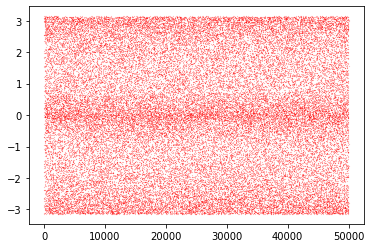

In [31]:
plt.plot(ran_list[0:50000],'ro',ms=0.1)

In [35]:
max(ran_list)-np.pi

0.0

In [36]:
min(ran_list)+np.pi

7.451304899008804e-05

In [38]:
mean(ran_list)

0.006678954012701093